## Урок 1. Алгоритм линейной регрессии. Градиентный спуск

In [1]:
import numpy as np
import matplotlib.pyplot as plt

__Задача:__ предсказание баллов ЕГЭ ученика в зависимости от кол-ва лет стажа его репетитора

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2]])
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  5,  3,  0,  5, 10,  1,  2]])

In [3]:
X.shape

(2, 10)

In [4]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Уравнение прямой: $y = a*x + b$

In [5]:
y_pred1 = 35 * np.ones(10) + X[1]*5
y_pred2 = 40 * np.ones(10) + X[1]*7.5

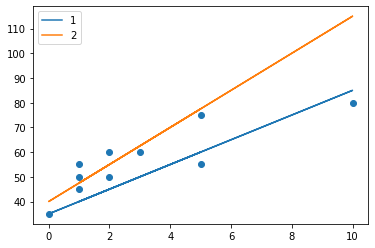

In [6]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1')
plt.plot(X[1], y_pred2, label='2')
plt.legend()
plt.show()

Простая ошибка

In [7]:
err1 = np.sum(y - y_pred1)
err2 = np.sum(y - y_pred2)
err1, err2

(65.0, -60.0)

MAE (Mean Absolute Error)

In [8]:
mae_1 = np.sum(np.abs(y - y_pred1)) / 10
mae_2 = np.sum(np.abs(y - y_pred2)) / 10
mae_1, mae_2

(8.5, 9.0)

MSE (Mean Squared Error)

In [9]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)
mse_1, mse_2

(97.5, 188.75)

Метод наименьших квадратов (МНК)

In [10]:
X.shape

(2, 10)

In [11]:
X.T.shape

(10, 2)

In [12]:
all(X @ y == np.dot(X,y))

True

In [13]:
W = np.linalg.inv(np.dot(X, X.T)) @ X @ y
W

array([45.0625,  3.8125])

In [14]:
y_pred3 = W[0] * X[0] + W[1] * X[1]

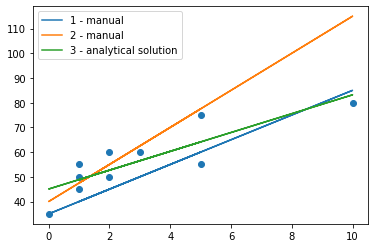

In [15]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1 - manual')
plt.plot(X[1], y_pred2, label='2 - manual')
plt.plot(X[1], y_pred3, label='3 - analytical solution')
plt.legend()
plt.show()

In [16]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2) # <=> 1/n * np.sum((y_pred - y)**2)
    return err

In [17]:
calc_mae(y, y_pred1), calc_mse(y, y_pred1)

(8.5, 97.5)

In [18]:
calc_mae(y, y_pred2), calc_mse(y, y_pred2)

(9.0, 188.75)

In [19]:
calc_mae(y, y_pred3), calc_mse(y, y_pred3)

(5.7875, 43.96875)

Градиентный спуск

In [20]:
n = 10
Q = 1/n * np.sum((y_pred3 - y)**2) # функционал ошибки, y = X*w

In [21]:
alpha = 1e-2 # величина шага
g = alpha * (1/n * 2 * np.sum(X[0] * (W[0] * X[0] - y)))

In [22]:
W[0], W[0] - g

(45.0625, 45.29125)

### Д/З

1. Подберите скорость обучения (alpha) и количество итераций

In [23]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(100):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    for k in range(len(W)):
        W[k] -= alpha * (2/n * np.sum(X[k] * (y_pred - y)))
    if i % 10 == 0:
        alpha /= 1.1
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 6.67106886 10.61676385], MSE = 749.71
Iteration #20: W_new = [ 9.49320908 10.25731657], MSE = 648.91
Iteration #30: W_new = [11.85740092  9.83349244], MSE = 570.46
Iteration #40: W_new = [13.86876921  9.46898661], MSE = 508.03
Iteration #50: W_new = [15.59085668  9.15672679], MSE = 457.73
Iteration #60: W_new = [17.07337653  8.88789585], MSE = 416.77
Iteration #70: W_new = [18.35601294  8.65530964], MSE = 383.06
Iteration #80: W_new = [19.47073522  8.45317196], MSE = 355.08
Iteration #90: W_new = [20.44350656  8.27677488], MSE = 331.65


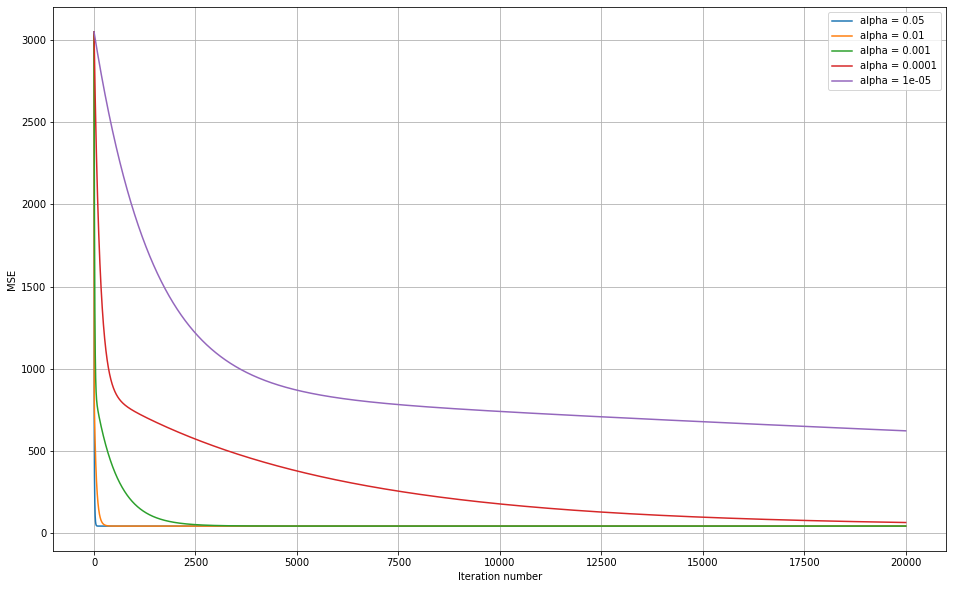

alpha = 0.05, mse = [3047.75      43.96875   43.96875   43.96875   43.96875   43.96875
   43.96875   43.96875   43.96875   43.96875]

alpha = 0.01, mse = [3047.75      43.96875   43.96875   43.96875   43.96875   43.96875
   43.96875   43.96875   43.96875   43.96875]

alpha = 0.001, mse = [3047.75         65.65129929   44.53250994   43.98340811   43.96913112
   43.96875991   43.96875026   43.96875001   43.96875      43.96875   ]

alpha = 0.0001, mse = [3047.75        622.98559051  445.99403646  323.10537266  237.78057412
  178.53734515  137.40322896  108.8427412    89.01245101   75.24376427]

alpha = 1e-05, mse = [3047.75       1381.08808253  950.17529841  823.61775635  772.57248588
  740.79310446  714.43596411  690.0754089   666.84605414  644.51234943]



In [24]:
len_w = X.shape[0]

def calc_grad_mse(alpha, iterations):
    W = np.array([1, 0.5])
    errors = []
    for i in range(iterations):
        y_pred = np.dot(W, X)
        errors.append(calc_mse(y, y_pred))
        for k in range(len_w):
            W[k] -= alpha * (2/n * np.sum(X[k] * (y_pred - y)))
    return errors


def plot_mse(errors, label_name):
    plt.figure(figsize=(16, 10))
    for labels_errors in errors:
        label = f'{label_name} = {labels_errors[0]}'
        errors = labels_errors[1]
        plt.plot(range(len(errors)), errors, label = label)

    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.grid(True)
    plt.legend()
    plt.show()    

alphas = [5e-2, 1e-2, 1e-3, 1e-4, 1e-5]
iterations = 20000

errors = []
for alpha in alphas:
    result = np.array(calc_grad_mse(alpha, iterations))
    errors.append((alpha, result))

plot_mse(errors, 'alpha')

for error_tuple in errors:
    err_arr = error_tuple[1]
    print_idx = np.mod(np.arange(err_arr.size), 2000)==0
    print(f'alpha = {error_tuple[0]}, mse = {err_arr[print_idx]}\n')


Видно, что минимальное значение ошибки при выбранных параметрах = 43.96875.
Оно достигается при наибольшем из заданных alpha = 0.05.
Проверим минимальное достаточное число итераций:

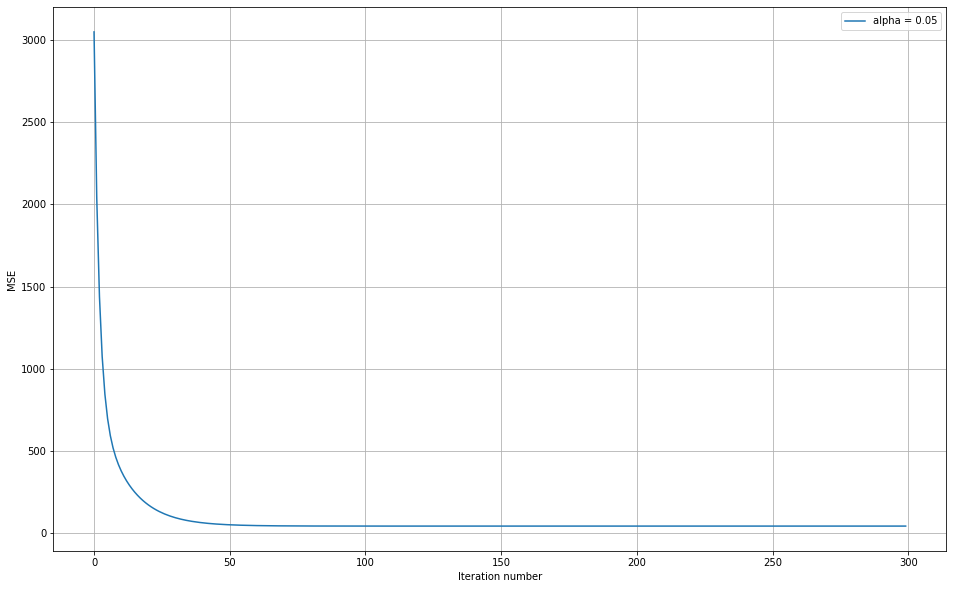

[43.96875001 43.96875001 43.96875001 43.96875001 43.96875001 43.96875001
 43.96875001 43.96875    43.96875    43.96875   ]


In [25]:
plot_mse([(errors[0][0], errors[0][1][:300])], 'alpha')

print(errors[0][1][270:280])

Ниже приведен пример неудачного сочетания параметров: большое значение альфа, а также увеличение mse при увеличении количества итераций.

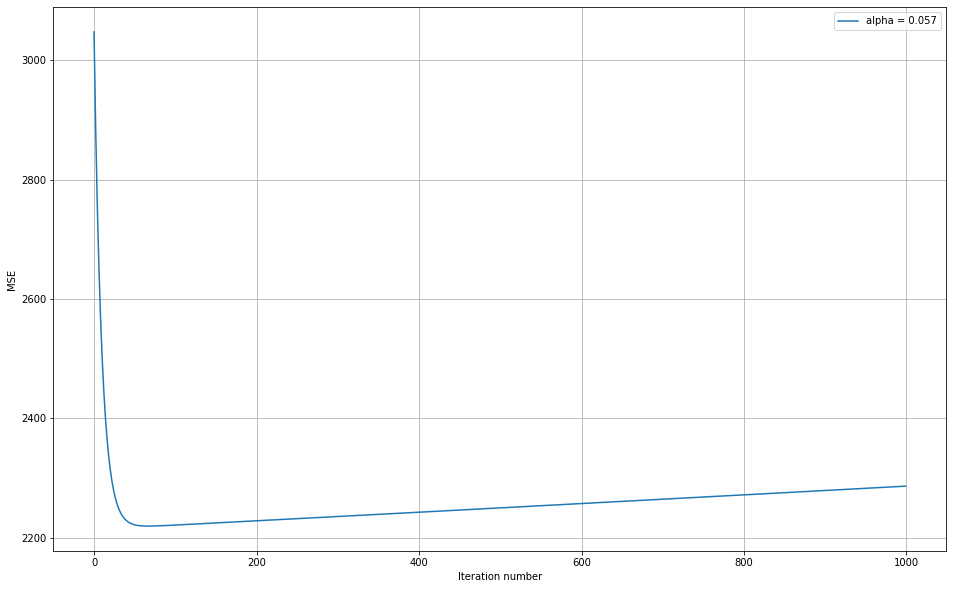

In [26]:
alpha = 0.057
errors = np.array(calc_grad_mse(alpha, 1000))
plot_mse([(alpha, errors)], 'alpha')

Итого, **alpha = 0.05, число операций = 280**

*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее

In [27]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(100):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    #for k in range(W.shape[0]):
    #     W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    
#     нужно суммировать столбцы Х, а не весь массив целиком -> добавим axis=1
    W -= alpha * (1/n * 2 * np.sum(X * (y_pred - y), axis=1))
    
    if i % 10 == 0:
#         вернула для сравнения с предыдущей реализацией
        alpha /= 1.1
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 6.67106886 10.61676385], MSE = 749.71
Iteration #20: W_new = [ 9.49320908 10.25731657], MSE = 648.91
Iteration #30: W_new = [11.85740092  9.83349244], MSE = 570.46
Iteration #40: W_new = [13.86876921  9.46898661], MSE = 508.03
Iteration #50: W_new = [15.59085668  9.15672679], MSE = 457.73
Iteration #60: W_new = [17.07337653  8.88789585], MSE = 416.77
Iteration #70: W_new = [18.35601294  8.65530964], MSE = 383.06
Iteration #80: W_new = [19.47073522  8.45317196], MSE = 355.08
Iteration #90: W_new = [20.44350656  8.27677488], MSE = 331.65


*3. Вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога (упрощенный аналог параметра tol в линейной регрессии в sklearn).

In [28]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])

max_iter = 1e3
min_weight_dist = 1e-8

weight_dist = np.inf
i = 0

while ( weight_dist > min_weight_dist) and (i < max_iter):
    w_prev = W.copy()
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= alpha * (1/n * 2 * np.sum(X * (y_pred - y), axis=1))

    weight_dist = np.linalg.norm(W - w_prev, ord=2)
    
    if (i % 10 == 0) and (i <= 100):
        alpha /= 1.1
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')
        
    i += 1

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 6.67106886 10.61676385], MSE = 749.71
Iteration #20: W_new = [ 9.49320908 10.25731657], MSE = 648.91
Iteration #30: W_new = [11.85740092  9.83349244], MSE = 570.46
Iteration #40: W_new = [13.86876921  9.46898661], MSE = 508.03
Iteration #50: W_new = [15.59085668  9.15672679], MSE = 457.73
Iteration #60: W_new = [17.07337653  8.88789585], MSE = 416.77
Iteration #70: W_new = [18.35601294  8.65530964], MSE = 383.06
Iteration #80: W_new = [19.47073522  8.45317196], MSE = 355.08
Iteration #90: W_new = [20.44350656  8.27677488], MSE = 331.65
Iteration #100: W_new = [21.29557245  8.12226587], MSE = 311.9


4. Сделайте выводы по результатам работы с GD : что повышает качество результата, что понижает.

Качество результата работы градиентного спуска повышает: оптимальное значение шага градиента (а также постепенное его уменьшение по мере увеличения итераций), выбор начальной точки, неизбыточное количество итераций.

Понижается качество, соответственно, в случае слишком большого или слишком малого шага градиента. В первом случае алгоритм может не достигнуть результата, во втором же потребуется чрезмерное число итераций, которое, кроме того, может привести к нахождению локального минимума вместо глобального.